In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import random
random.seed(50)

In [2]:
data,labels = datasets.make_classification(n_samples = 300 ,n_features = 2,n_redundant=0, n_clusters_per_class=1, random_state=20, n_informative=2)
data,data_test,labels,labels_test = train_test_split(data,labels,test_size = 0.2,shuffle=True)
data.shape, data_test.shape, labels.shape, labels_test.shape

((240, 2), (60, 2), (240,), (60,))

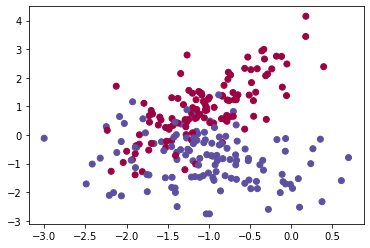

In [3]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=plt.cm.Spectral_r)

In [4]:
class LogisticRegressionNumpy():
    def __init__(self,lr=0.01,epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = 0
        self.bias = 0
    
    def normalize(self,x):
        for i in range(self.n):
            x = (x - x.mean(axis=0))/x.std(axis=0)
        return x

    def sigmoid(self,x):
        return (1/(1+np.exp(-(np.dot(x,self.weights) + self.bias))))
    
    def loss_calc(self, y_pred):
        self.loss = -np.mean(self.y*(np.log(y_pred)) - (1-self.y)*np.log(1-y_pred))
        return self.loss
    
    def gradient(self):
        m = self.x.shape[0]
        dw = 1/m * np.dot(self.x.T,(self.sigmoid(self.x) - self.y))
        db = 1/m * np.sum(self.sigmoid(self.x) - self.y)
        return dw,db

    def fit(self,x,y):
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.x = x
        self.y = y.reshape((self.m,1))
        self.weights = np.zeros((self.n,1))
        self.bias = 0

        self.x = self.normalize(self.x)
        losses=[]

        for epoch in range(self.epochs):
            y_pred = self.sigmoid(self.x)
            dw,db = self.gradient()

            #Update params
            self.weights -= self.lr*dw
            self.bias -= self.lr*db

            #Calculate loss
            loss = self.loss_calc(y_pred)
            losses.append(loss)
        
        return(self.weights,self.bias,losses)
    
    def predict(self,x):
        x = self.normalize(x)
        preds = self.sigmoid(x)
        pred_class = [1 if i > 0.5 else 0 for i in preds]
        return np.array(pred_class)
    
    def accuracy(self,y,y_pred):
        acc = np.sum(y == y_pred)/len(y)
        return acc

In [5]:
model = LogisticRegressionNumpy(0.001,3000)
w,b,l = model.fit(data,labels)
y_pred = model.predict(data)
print("Training Accuracy: ",model.accuracy(labels,y_pred))

test_pred = model.predict(data_test)
print("Testing Accuracy: ",model.accuracy(labels_test, test_pred))

Training Accuracy:  0.8333333333333334
Testing Accuracy:  0.8833333333333333


In [6]:
def plottingLogisticReg(data, labels, w, b, title_acc=None, figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    if title_acc!=None:
        txt = "{}: {:.5}".format(title_acc[0],str(title_acc[1]))
        plt.title(txt)
    w1, w2 = w
    c = -b/w2
    m = -w1/w2  
    xmin, xmax = min(data[:,0]),max(data[:,0])
    ymin, ymax = min(data[:,1]),max(data[:,1])
    xd = np.array([xmin, xmax])
    yd = m*xd + c
    plt.plot(xd, yd, 'k', lw=1, ls='--')
    plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
    plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

    plt.scatter(*data[labels==0].T, s=8, alpha=0.5)
    plt.scatter(*data[labels==1].T, s=8, alpha=0.5)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.ylabel(r'$y_axis$')
    plt.xlabel(r'$x_axis$')

    plt.show()

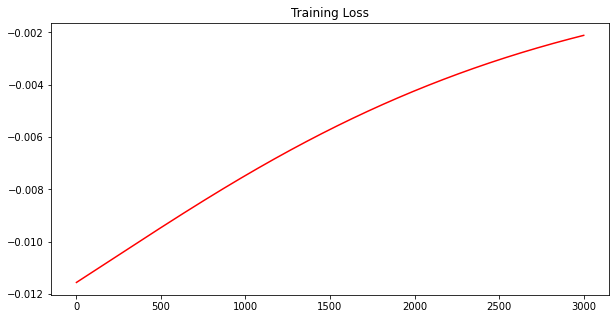

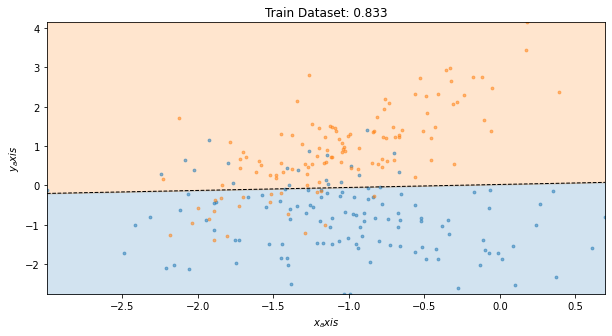

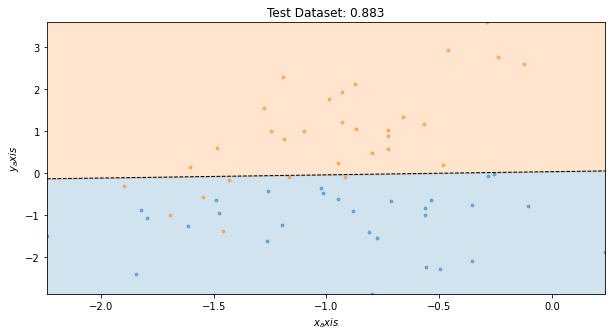

In [7]:
fig1 = plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(range(1,len(l)+1),l,color = 'red')

plottingLogisticReg(data,labels,w,b,title_acc= ("Train Dataset",model.accuracy(labels,y_pred)))
plottingLogisticReg(data_test,labels_test,w,b,title_acc = ("Test Dataset",model.accuracy(labels_test, test_pred)))

Accuracy Score:  0.8291666666666667


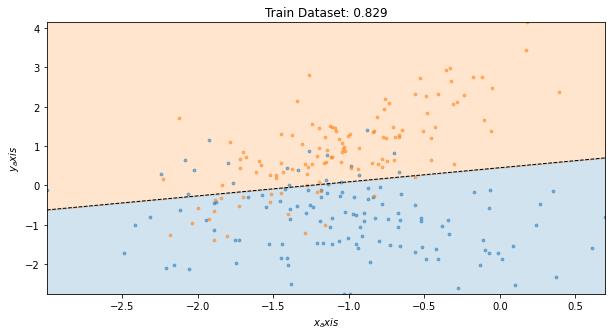

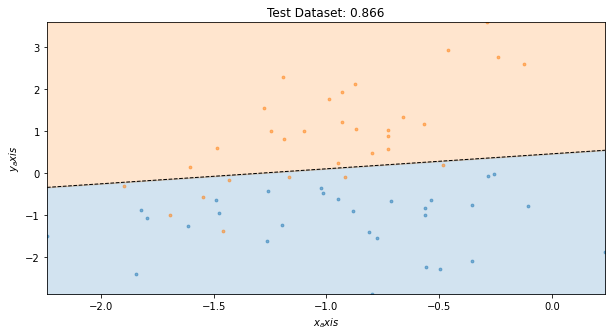

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
skmodel = LogisticRegression()
skmodel.fit(data,labels)
skmodel.coef_, skmodel.intercept_

print("Accuracy Score: ", accuracy_score(labels,skmodel.predict(data)))
plottingLogisticReg(data,labels,skmodel.coef_.T,skmodel.intercept_[0],title_acc= ("Train Dataset",accuracy_score(labels,skmodel.predict(data))))
plottingLogisticReg(data_test,labels_test,skmodel.coef_.T,skmodel.intercept_[0],title_acc= ("Test Dataset",accuracy_score(labels_test,skmodel.predict(data_test))))